<h1>IMPORTANDO AS BIBLIOTECAS QUE SERÃO USADAS NO PROJETO</h1>

In [1]:
#Celula contendo apenas as bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h1>ANALISAREMOS O GRUPO :  http://dados.ufrn.br/group/ensino </h1>

In [8]:
docentes_url = "http://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070/download/docentes.csv"
docentes = pd.read_csv(docentes_url, sep=';')

avaliacao_docentes_url = 'http://dados.ufrn.br/dataset/d5723d75-7e6e-4264-82aa-b96909b69f63/resource/7accd1d2-2793-460e-b98d-87a0679b9155/download/avaliacaodocencia.csv'
avaliacao_docentes = pd.read_csv(avaliacao_docentes_url, sep=';')

In [14]:
docentes.rename(columns={'id_servidor': 'id_docente'}, inplace=True)

In [13]:
avaliacao_docentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58875 entries, 0 to 58874
Data columns (total 12 columns):
id_docente                    58875 non-null int64
nome_docente                  58875 non-null object
id_turma                      58875 non-null int64
ano                           58875 non-null int64
periodo                       58875 non-null int64
qtd_discentes                 58875 non-null int64
postura_profissional_media    58875 non-null float64
postura_profissional_DP       58875 non-null float64
atuacao_profissional_media    58875 non-null float64
atuacao_profissional_DP       58875 non-null float64
autoavaliacao_aluno_media     58875 non-null float64
autoavaliacao_aluno_DP        58875 non-null float64
dtypes: float64(6), int64(5), object(1)
memory usage: 5.4+ MB


In [12]:
docentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 12 columns):
id_servidor              2325 non-null int64
siape                    2325 non-null int64
nome                     2325 non-null object
formacao                 2325 non-null object
tipo_jornada_trabalho    2325 non-null object
vinculo                  2325 non-null object
categoria                2325 non-null object
classe_funcional         2325 non-null object
id_unidade_lotacao       2325 non-null int64
lotacao                  2325 non-null object
admissao                 2325 non-null object
Unnamed: 11              0 non-null float64
dtypes: float64(1), int64(3), object(8)
memory usage: 218.0+ KB


In [15]:
colunas = ['id_docente', 'lotacao', 'ano', 'postura_profissional_media', 'atuacao_profissional_media', 'autoavaliacao_aluno_media']

merge_docentes_avaliacao = pd.merge(docentes, avaliacao_docentes, on = 'id_docente')[colunas]

In [16]:
docentes_avaliacao_imd = merge_docentes_avaliacao[merge_docentes_avaliacao.lotacao == "INSTITUTO METROPOLE DIGITAL"]
docentes_avaliacao_imd.lotacao = "IMD"

docentes_avaliacao_dimap = merge_docentes_avaliacao[merge_docentes_avaliacao.lotacao == "DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA"]
docentes_avaliacao_dimap.lotacao = "DIMAP"


C:\Users\alesy\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
#Avaliacoes 2013 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2013 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2013]
docentes_avaliacao_imd_2013 = docentes_avaliacao_imd_2013[~docentes_avaliacao_imd_2013.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2013 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2013]
docentes_avaliacao_dimap_2013 = docentes_avaliacao_dimap_2013[~docentes_avaliacao_dimap_2013.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2013 = pd.concat([docentes_avaliacao_dimap_2013, docentes_avaliacao_imd_2013])

In [18]:
#Avaliacoes 2014 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2014 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2014]
docentes_avaliacao_imd_2014 = docentes_avaliacao_imd_2014[~docentes_avaliacao_imd_2014.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2014 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2014]
docentes_avaliacao_dimap_2014 = docentes_avaliacao_dimap_2014[~docentes_avaliacao_dimap_2014.id_docente.duplicated()]
avaliacoes_2014 = pd.concat([docentes_avaliacao_dimap_2014, docentes_avaliacao_imd_2014])

In [19]:
#Avaliacoes 2015 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2015 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2015]
docentes_avaliacao_imd_2015 = docentes_avaliacao_imd_2015[~docentes_avaliacao_imd_2015.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2015 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2015]
docentes_avaliacao_dimap_2015 = docentes_avaliacao_dimap_2015[~docentes_avaliacao_dimap_2015.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2015 = pd.concat([docentes_avaliacao_dimap_2015, docentes_avaliacao_imd_2015])

In [20]:
#Avaliacoes 2016 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2016 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2016]
docentes_avaliacao_imd_2016 = docentes_avaliacao_imd_2016[~docentes_avaliacao_imd_2016.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2016 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2016]
docentes_avaliacao_dimap_2016 = docentes_avaliacao_dimap_2016[~docentes_avaliacao_dimap_2016.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2016 = pd.concat([docentes_avaliacao_dimap_2016, docentes_avaliacao_imd_2016])

In [21]:
#Avaliacoes 2017 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2017 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2017]
docentes_avaliacao_imd_2017 = docentes_avaliacao_imd_2017[~docentes_avaliacao_imd_2017.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2017 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2017]
docentes_avaliacao_dimap_2017 = docentes_avaliacao_dimap_2017[~docentes_avaliacao_dimap_2017.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2017 = pd.concat([docentes_avaliacao_dimap_2017, docentes_avaliacao_imd_2017])

In [157]:
avaliacoes_dimap = pd.concat([docentes_avaliacao_dimap_2013,docentes_avaliacao_dimap_2014,docentes_avaliacao_dimap_2015,docentes_avaliacao_dimap_2016,docentes_avaliacao_dimap_2017])
avaliacoes_imd = pd.concat([docentes_avaliacao_imd_2013,docentes_avaliacao_imd_2014,docentes_avaliacao_imd_2015,docentes_avaliacao_imd_2016,docentes_avaliacao_imd_2017])

avaliacoes = pd.concat([avaliacoes_dimap,avaliacoes_imd])

In [238]:
avaliacoes_dimap_media = avaliacoes_dimap.pivot_table(index="ano",
                 values=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                 aggfunc=np.mean)
anos= [2013,2014,2015,2016,2017]
avaliacoes_dimap_media['ano'] = anos
avaliacoes_dimap_media.rename(columns={'postura_profissional_media': 'postura_profissional_media_dimap',
                                 'autoavaliacao_aluno_media' : 'autoavaliacao_aluno_media_dimap', 
                                 'atuacao_profissional_media' : 'atuacao_profissional_media_dimap'}, inplace=True)

In [237]:
avaliacoes_imd_media = avaliacoes_imd.pivot_table(index="ano",
                 values=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                 aggfunc=np.mean)
anos= [2013,2014,2015,2016,2017]
avaliacoes_imd_media['ano'] = anos
avaliacoes_imd_media.rename(columns={'postura_profissional_media': 'postura_profissional_media_imd',
                                 'autoavaliacao_aluno_media' : 'autoavaliacao_aluno_media_imd', 
                                 'atuacao_profissional_media' : 'atuacao_profissional_media_imd'}, inplace=True)

In [214]:
avaliacoes_medias = pd.merge(avaliacoes_imd_media, avaliacoes_dimap_media)
avaliacoes_medias

,atuacao_profissional_media_imd,autoavaliacao_aluno_media_imd,postura_profissional_media_imd,ano,atuacao_profissional_media_dimap,autoavaliacao_aluno_media_dimap,postura_profissional_media_dimap
0,8.945556,8.494444,9.571111,2013,8.678800,8.446800,9.376800
1,9.236842,8.531053,9.593158,2014,8.860000,8.432813,9.485312
2,9.060000,8.508387,9.647097,2015,8.781786,8.414286,9.328214
3,9.141515,8.446667,9.594848,2016,8.692333,8.450000,9.424000
4,9.398000,8.754333,9.688667,2017,9.251786,8.733929,9.716429


C:\Users\alesy\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


TypeError: __init__() got an unexpected keyword argument 'size'

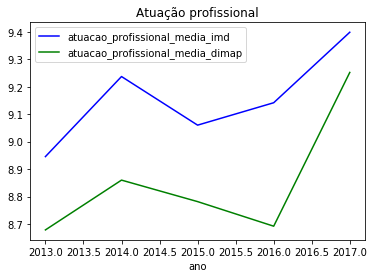

In [283]:
axe1 = avaliacoes_medias.plot(kind='line',x='ano',y=["atuacao_profissional_media_imd", "atuacao_profissional_media_dimap"],
                                title='Atuação profissional',
                                color=['blue', 'green']).\
                                    legend(loc='best',
                               labels=['IMD','DIMAP'])
    
avaliacoes_medias.plot(kind='line',x='ano',y=["autoavaliacao_aluno_media_imd", "autoavaliacao_aluno_media_dimap"],
                   title='Auto avaliação',
                   color=['blue', 'green']).\
                        legend(loc='best',
                               labels=['IMD','DIMAP'])
avaliacoes_medias.plot(kind='line',x='ano',y=["postura_profissional_media_imd", "postura_profissional_media_dimap"],
                   title='Postura profissional',
                   color=['blue', 'green']).\
                        legend(loc='best',
                               labels=['IMD','DIMAP'])